In [1]:
import pandas as pd

df = pd.read_csv("df_ligas_tratado.csv")

df.head()

,fixture.date,fixture.venue.id,fixture.venue.name,fixture.venue.city,fixture.status.short,league.id,league.name,league.country,teams.home.id,teams.home.name,teams.away.id,teams.away.name,goals.home,goals.away,winner,winner.team
0,2023-08-18,755.0,wohninvest WESERSTADION,Bremen,FT,78,Bundesliga,Germany,162,Werder Bremen,157,Bayern Munich,0,4,Vitória_Visitante,Bayern Munich
1,2023-08-19,752.0,Volkswagen Arena,Wolfsburg,FT,78,Bundesliga,Germany,161,VfL Wolfsburg,180,FC Heidenheim,2,0,Vitória_Casa,VfL Wolfsburg
2,2023-08-19,724.0,PreZero Arena,Sinsheim,FT,78,Bundesliga,Germany,167,1899 Hoffenheim,160,SC Freiburg,1,2,Vitória_Visitante,SC Freiburg
3,2023-08-19,699.0,BayArena,Leverkusen,FT,78,Bundesliga,Germany,168,Bayer Leverkusen,173,RB Leipzig,3,2,Vitória_Casa,Bayer Leverkusen
4,2023-08-19,698.0,WWK Arena,Augsburg,FT,78,Bundesliga,Germany,170,FC Augsburg,163,Borussia Monchengladbach,4,4,Empate,-


C:\Users\leona\AppData\Local\Temp\ipykernel_3748\3262825651.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


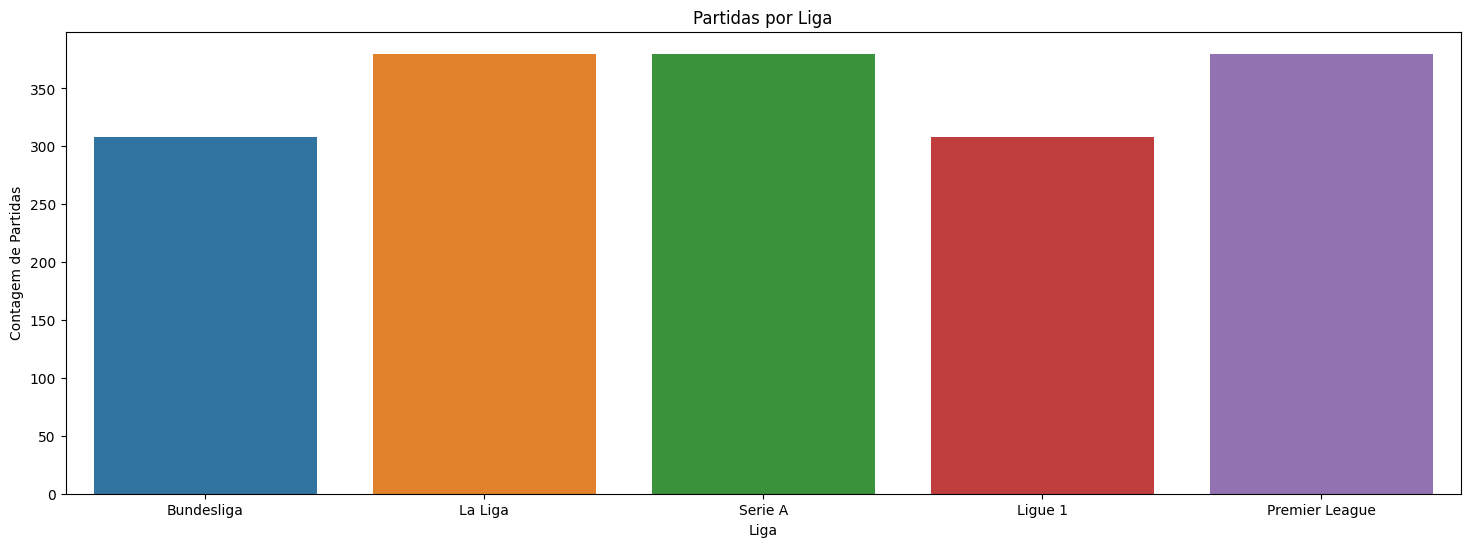

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(18,6))

sns.countplot(data=df, ax=ax, x='league.name', hue='league.name')
ax.set_title('Partidas por Liga')
ax.set_xlabel('Liga')
ax.set_ylabel('Contagem de Partidas')

fig.show()

C:\Users\leona\AppData\Local\Temp\ipykernel_3748\4142212517.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


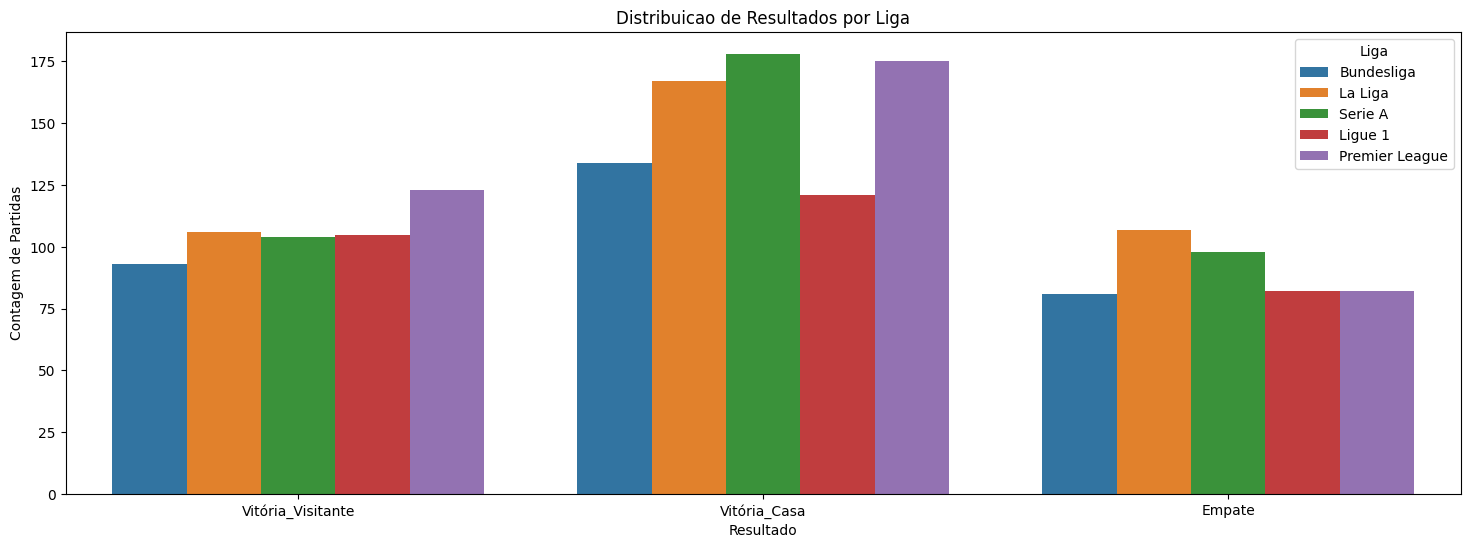

In [3]:
fig, ax = plt.subplots(figsize=(18,6))

sns.countplot(data=df, ax=ax, x='winner', hue='league.name')
ax.set_title('Distribuicao de Resultados por Liga')
ax.set_xlabel('Resultado')
ax.set_ylabel('Contagem de Partidas')
ax.legend(title='Liga')

fig.show()

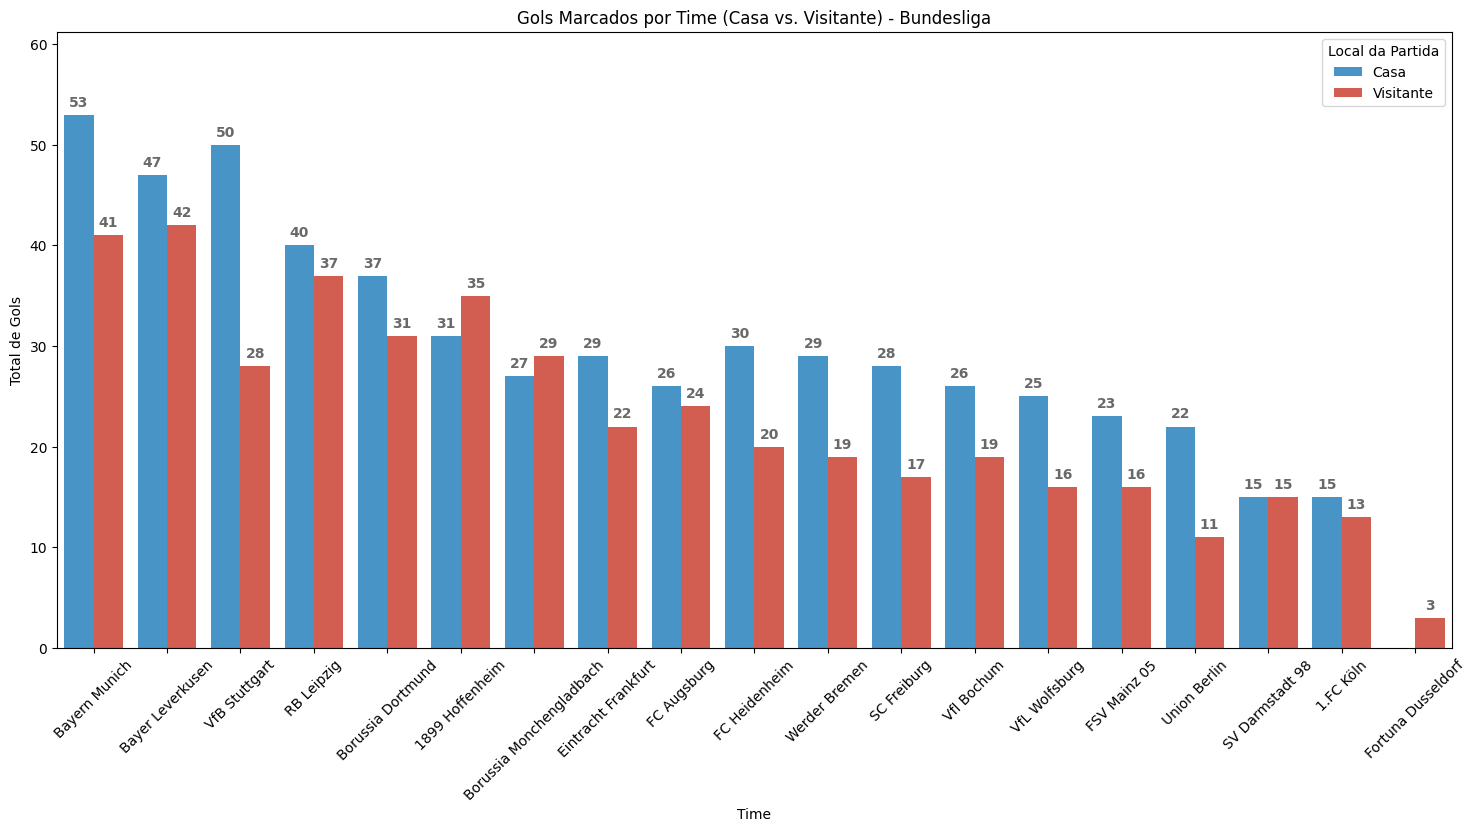

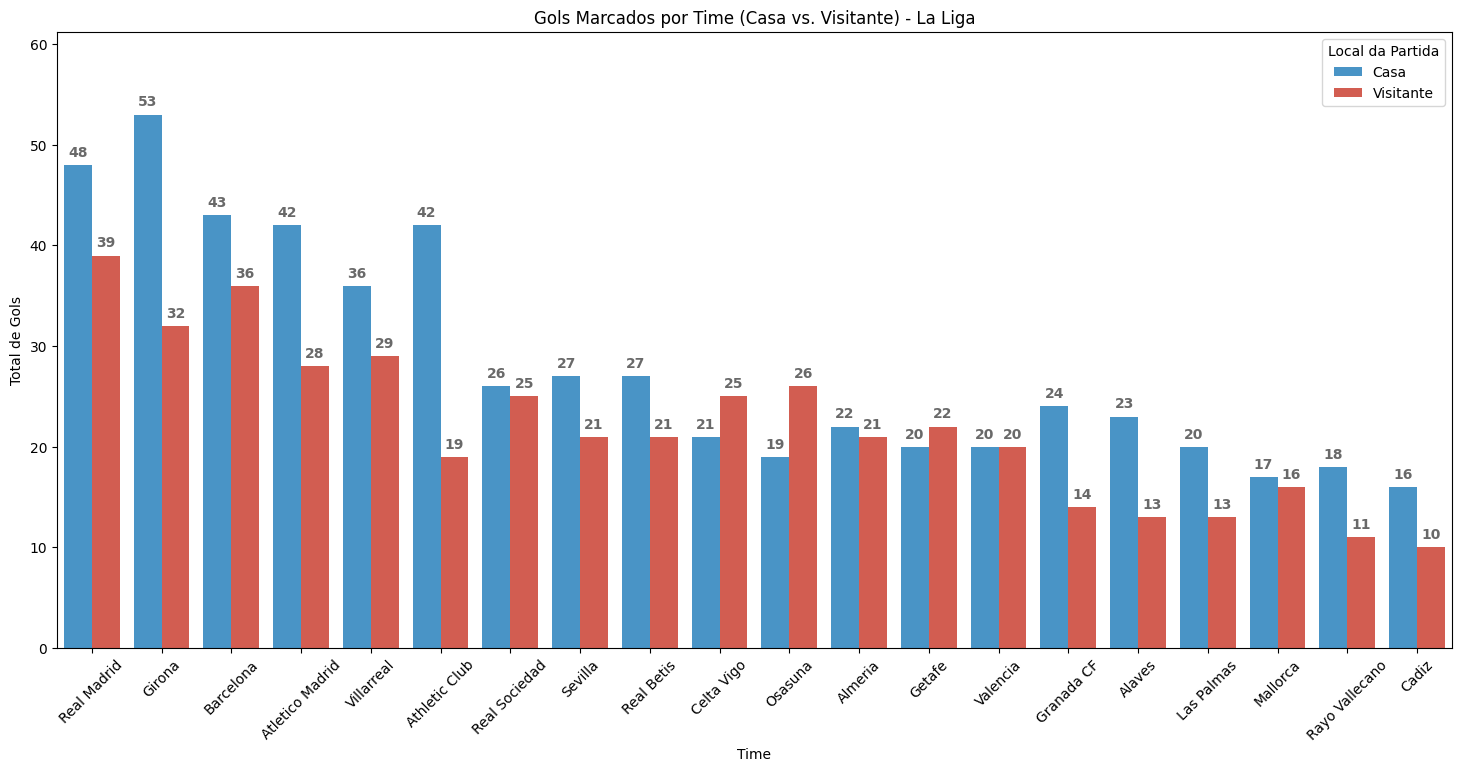

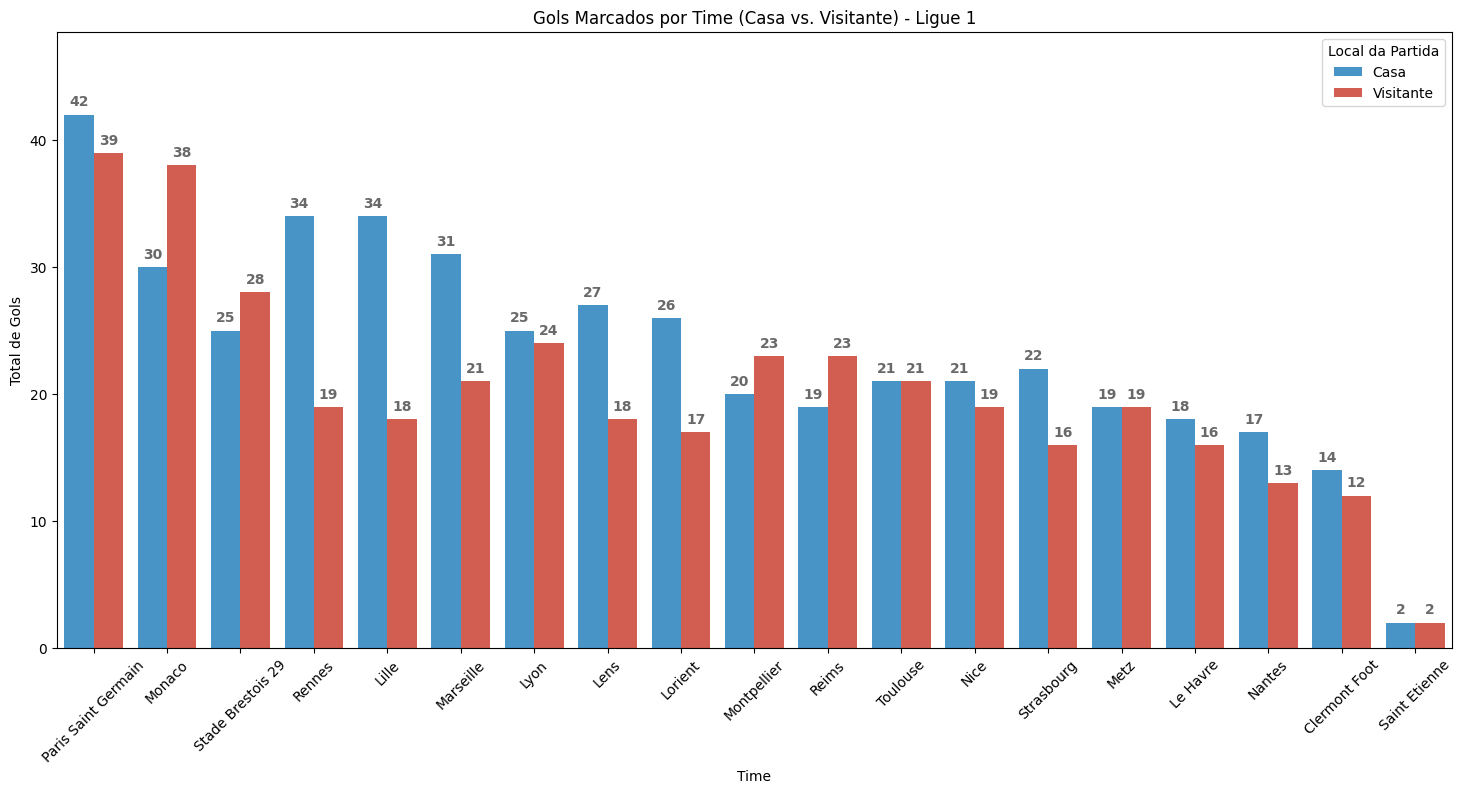

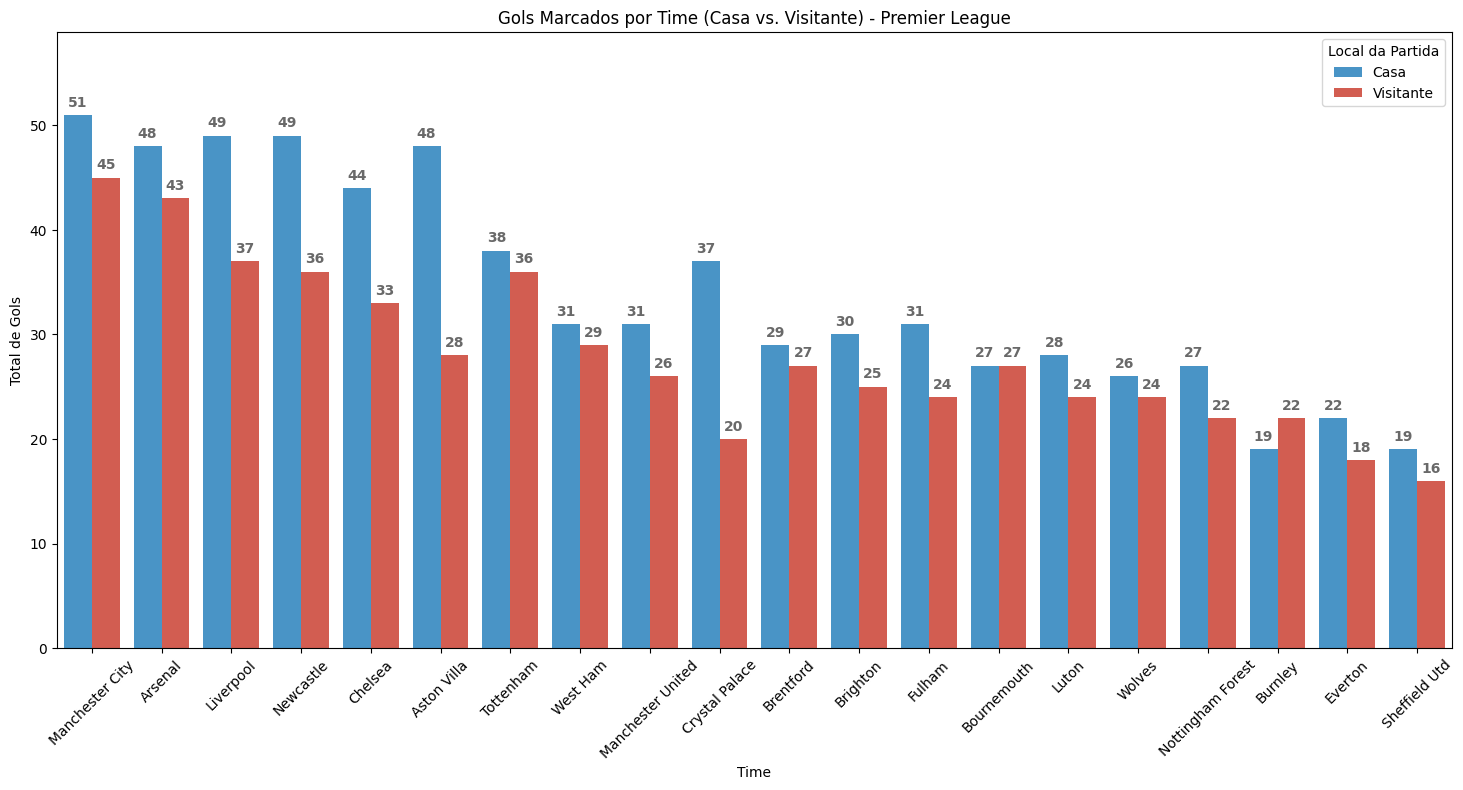

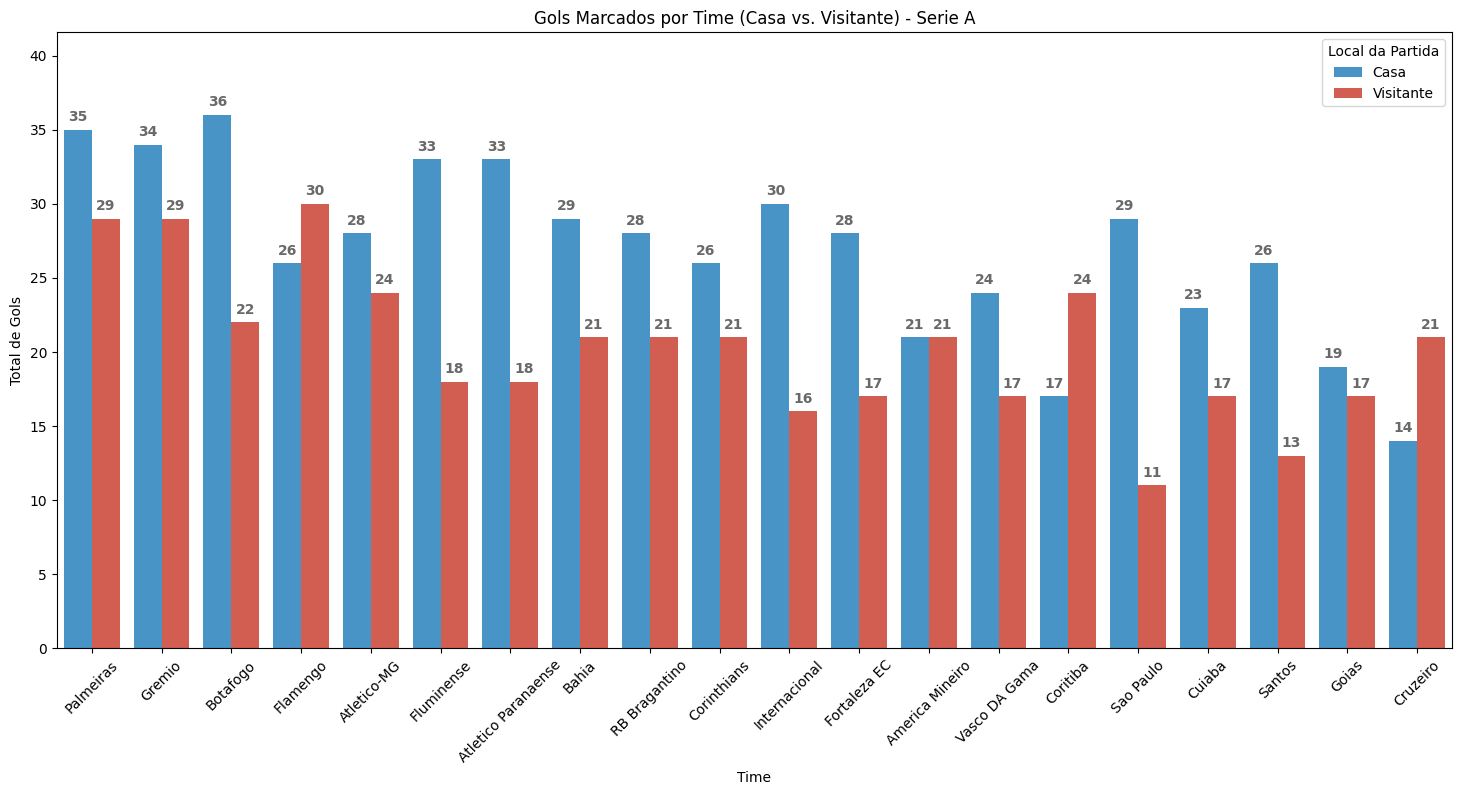

In [4]:
# Gols marcados em casa
home_goals = df.groupby(['league.name', 'teams.home.name'])['goals.home'].sum().reset_index()
home_goals = home_goals.rename(columns={'teams.home.name': 'time', 'goals.home': 'gols'})
home_goals['tipo'] = 'Casa'

# Gols marcados como visitante
away_goals = df.groupby(['league.name', 'teams.away.name'])['goals.away'].sum().reset_index()
away_goals = away_goals.rename(columns={'teams.away.name': 'time', 'goals.away': 'gols'})
away_goals['tipo'] = 'Visitante'

# Unindo ambos os dfs
team_goals = pd.concat([home_goals, away_goals])
team_goals.sort_values(['league.name', 'time'], inplace=True)

total_goals = team_goals.groupby('time')['gols'].sum().sort_values(ascending=False)

# Plot dos graficos

ligas = team_goals['league.name'].unique()

for liga in ligas:
    league_data = team_goals[team_goals['league.name'] == liga]
    teams_order = [time for time in total_goals.index if time in league_data['time'].unique()]

    plt.figure(figsize=(18,8))
    ax = sns.barplot(data=league_data, x='time', y='gols', hue='tipo', palette=['#3498db', '#e74c3c'], order=teams_order)

    # Adiciona o rotulo de dados
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0,9),
                        textcoords='offset points',
                        fontsize=10,
                        color='dimgray',
                        weight='bold')

    ax.set_ylim(top=ax.get_ylim()[1] * 1.1)

    ax.set_title(f'Gols Marcados por Time (Casa vs. Visitante) - {liga}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Total de Gols')
    ax.legend(title='Local da Partida')
    plt.xticks(rotation=45)
    plt.tight_layout

    plt.show()

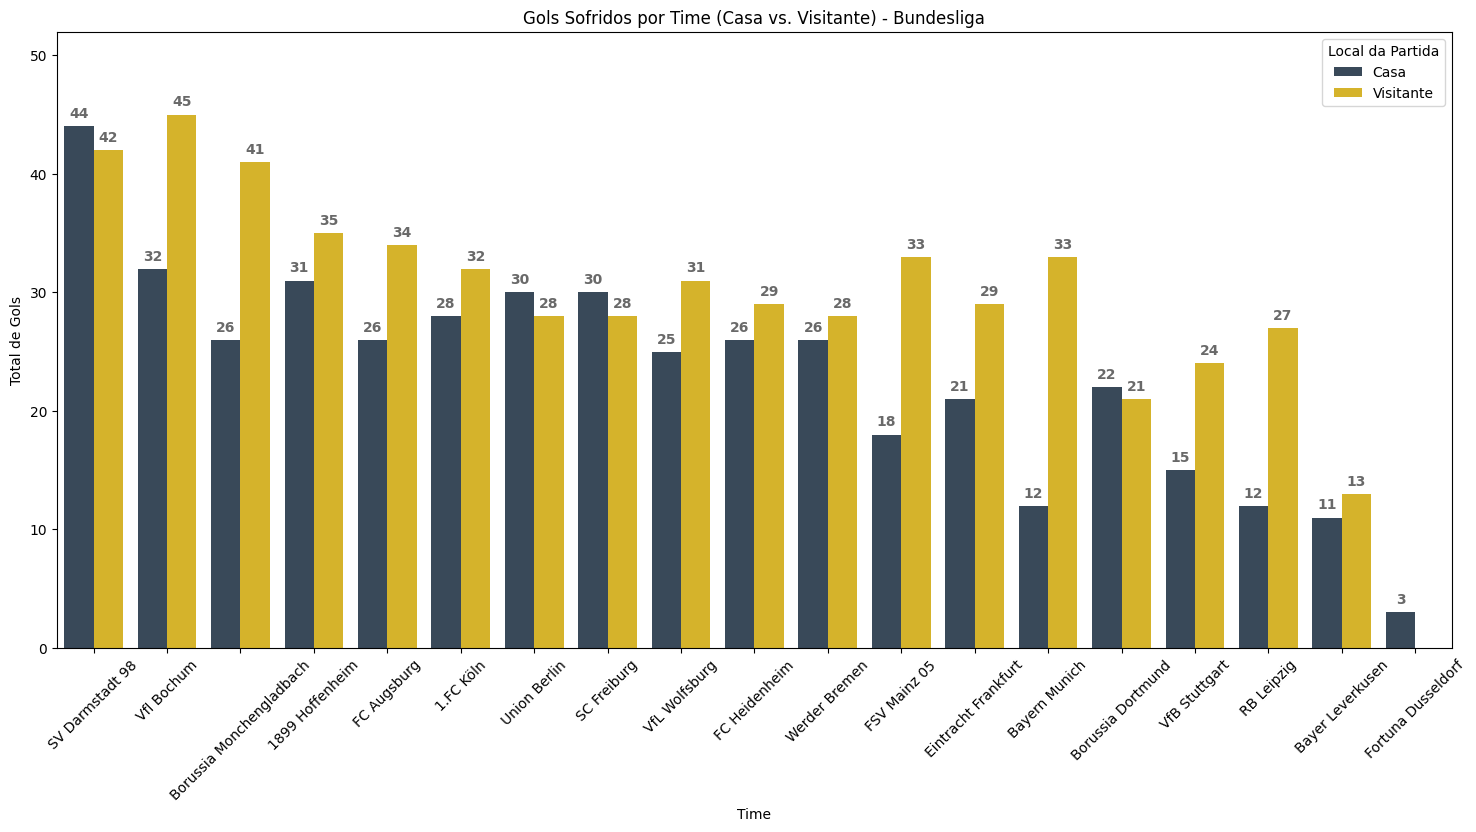

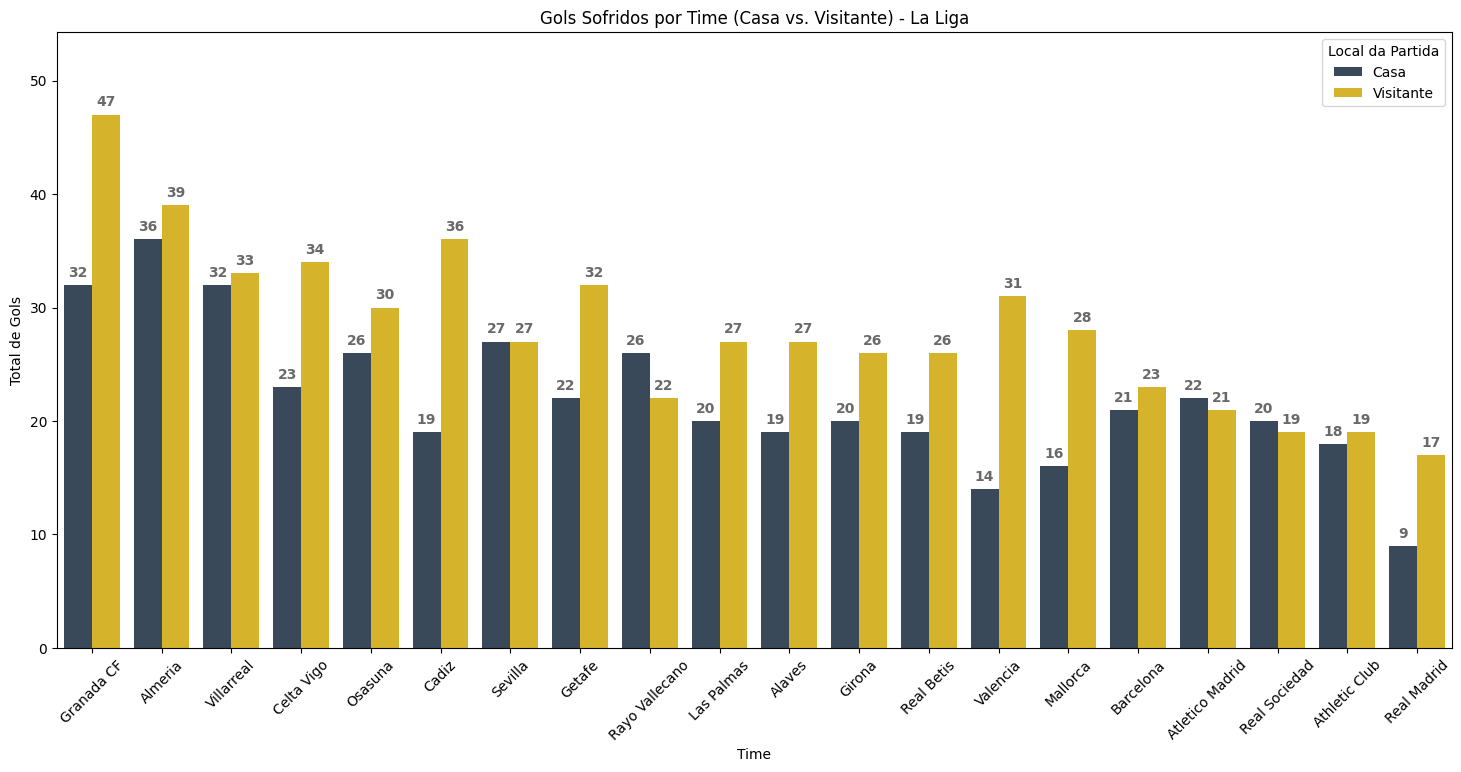

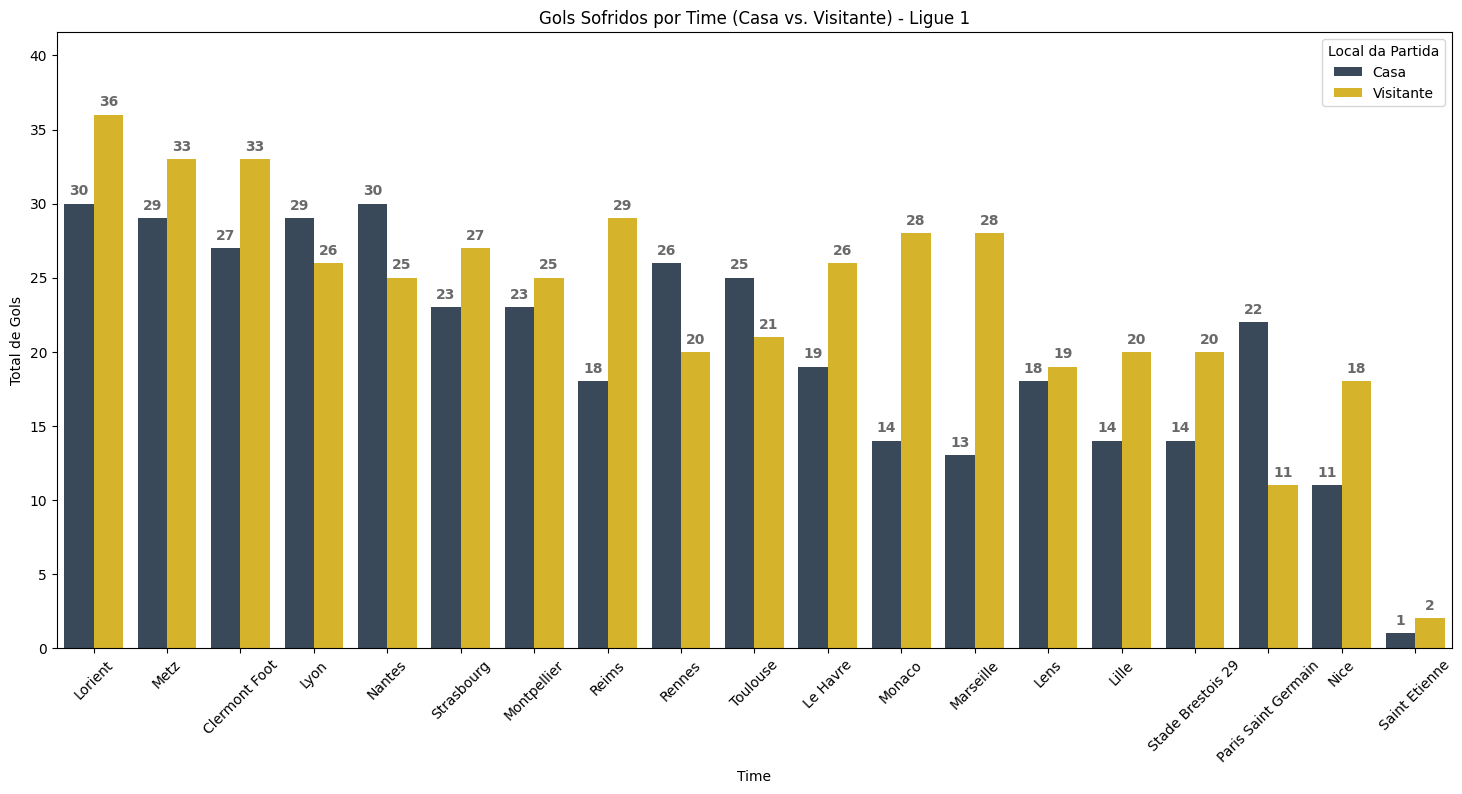

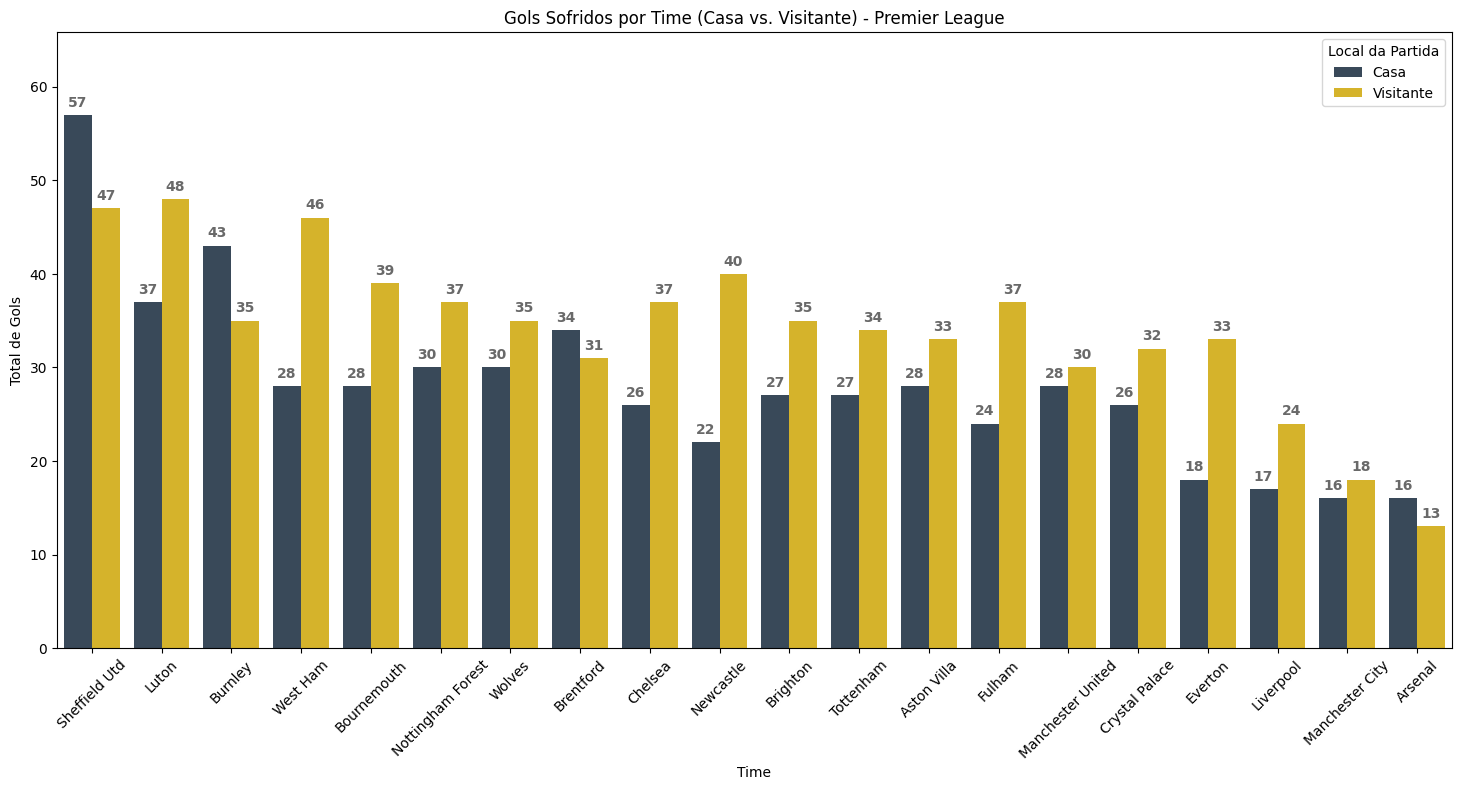

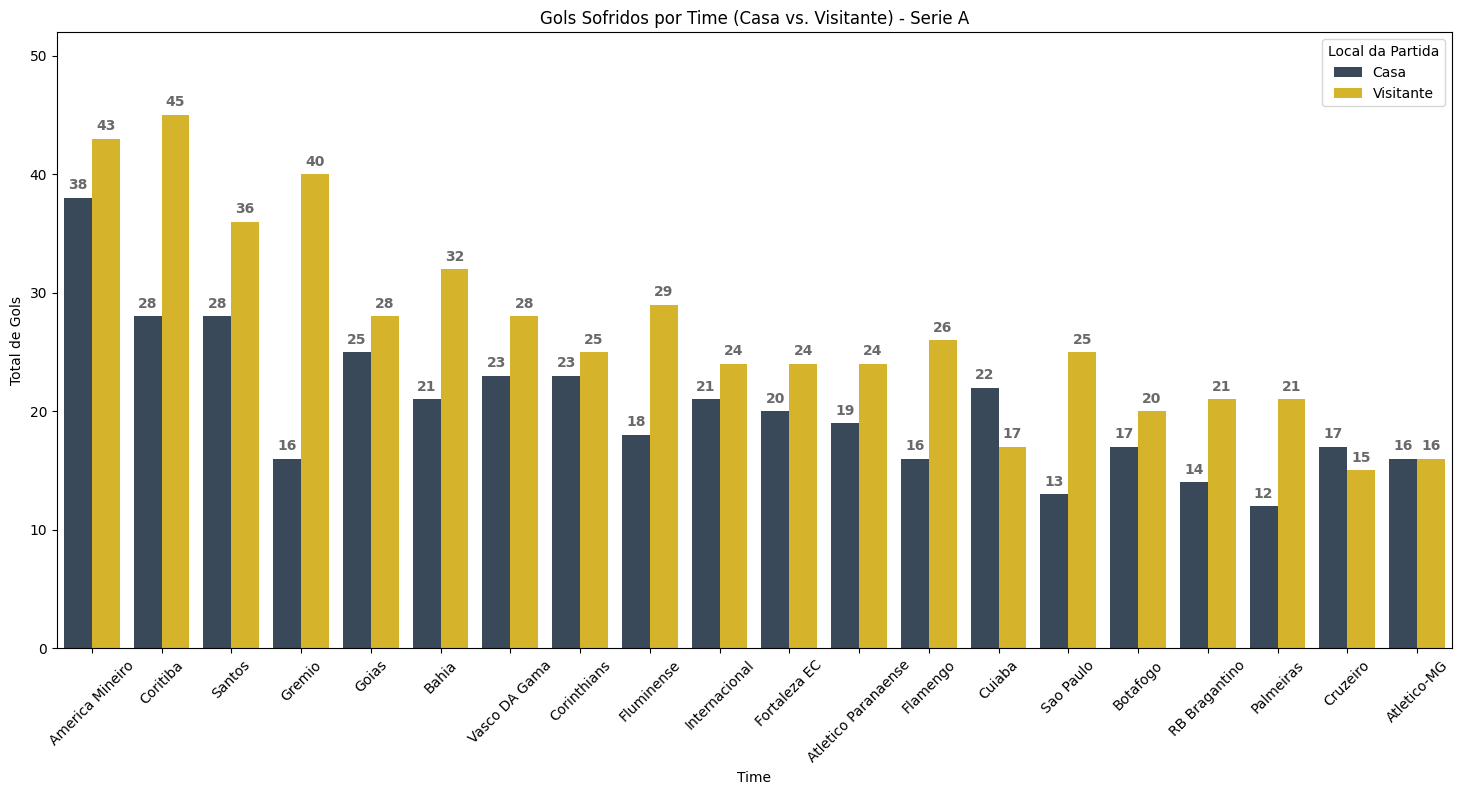

In [5]:
# Gols sofridos em casa
home_goals_taken = df.groupby(['league.name', 'teams.home.name'])['goals.away'].sum().reset_index()
home_goals_taken = home_goals_taken.rename(columns={'teams.home.name': 'time', 'goals.away': 'gols sofridos'})
home_goals_taken['tipo'] = 'Casa'

# Gols sofridos como visitante
away_goals_taken = df.groupby(['league.name', 'teams.away.name'])['goals.home'].sum().reset_index()
away_goals_taken = away_goals_taken.rename(columns={'teams.away.name': 'time', 'goals.home': 'gols sofridos'})
away_goals_taken['tipo'] = 'Visitante'

# Unindo ambos os dfs
team_goals_taken = pd.concat([home_goals_taken, away_goals_taken])
team_goals_taken.sort_values(['league.name', 'time'], inplace=True)

total_goals_taken = team_goals_taken.groupby('time')['gols sofridos'].sum().sort_values(ascending=False)

# Plot dos graficos

ligas = team_goals_taken['league.name'].unique()

for liga in ligas:
    league_data = team_goals_taken[team_goals_taken['league.name'] == liga]
    teams_order = [time for time in total_goals_taken.index if time in league_data['time'].unique()]

    plt.figure(figsize=(18,8))
    ax = sns.barplot(data=league_data, x='time', y='gols sofridos', hue='tipo', palette=['#34495e', '#f1c40f'], order=teams_order)

    # Adiciona o rotulo de dados
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0,9),
                        textcoords='offset points',
                        fontsize=10,
                        color='dimgray',
                        weight='bold')

    ax.set_ylim(top=ax.get_ylim()[1] * 1.1)

    ax.set_title(f'Gols Sofridos por Time (Casa vs. Visitante) - {liga}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Total de Gols')
    ax.legend(title='Local da Partida')
    plt.xticks(rotation=45)
    plt.tight_layout

    plt.show()

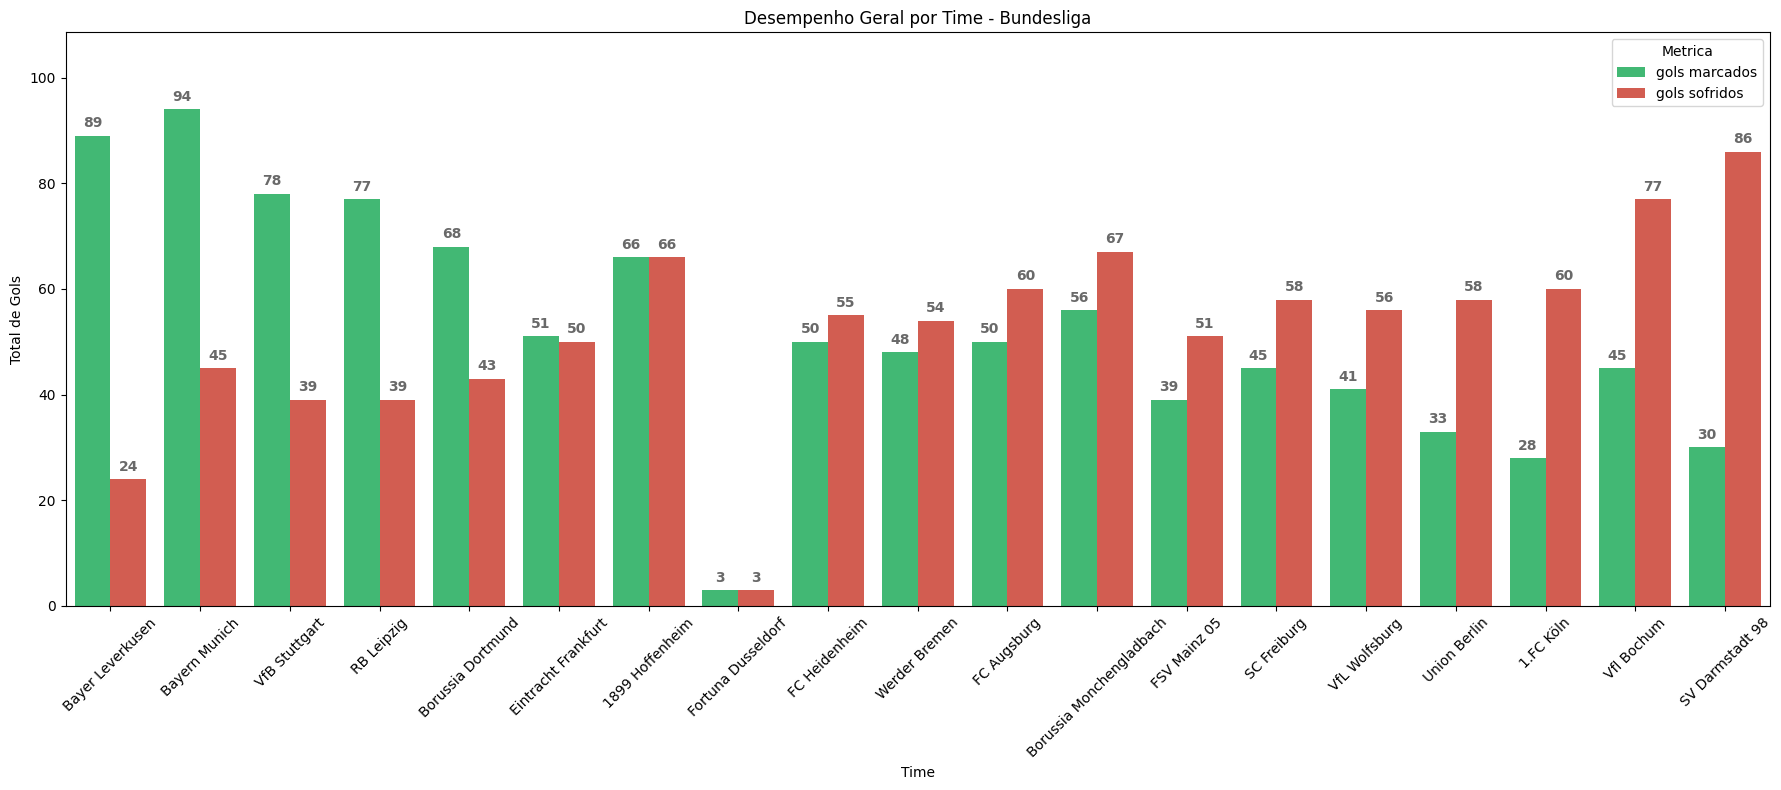

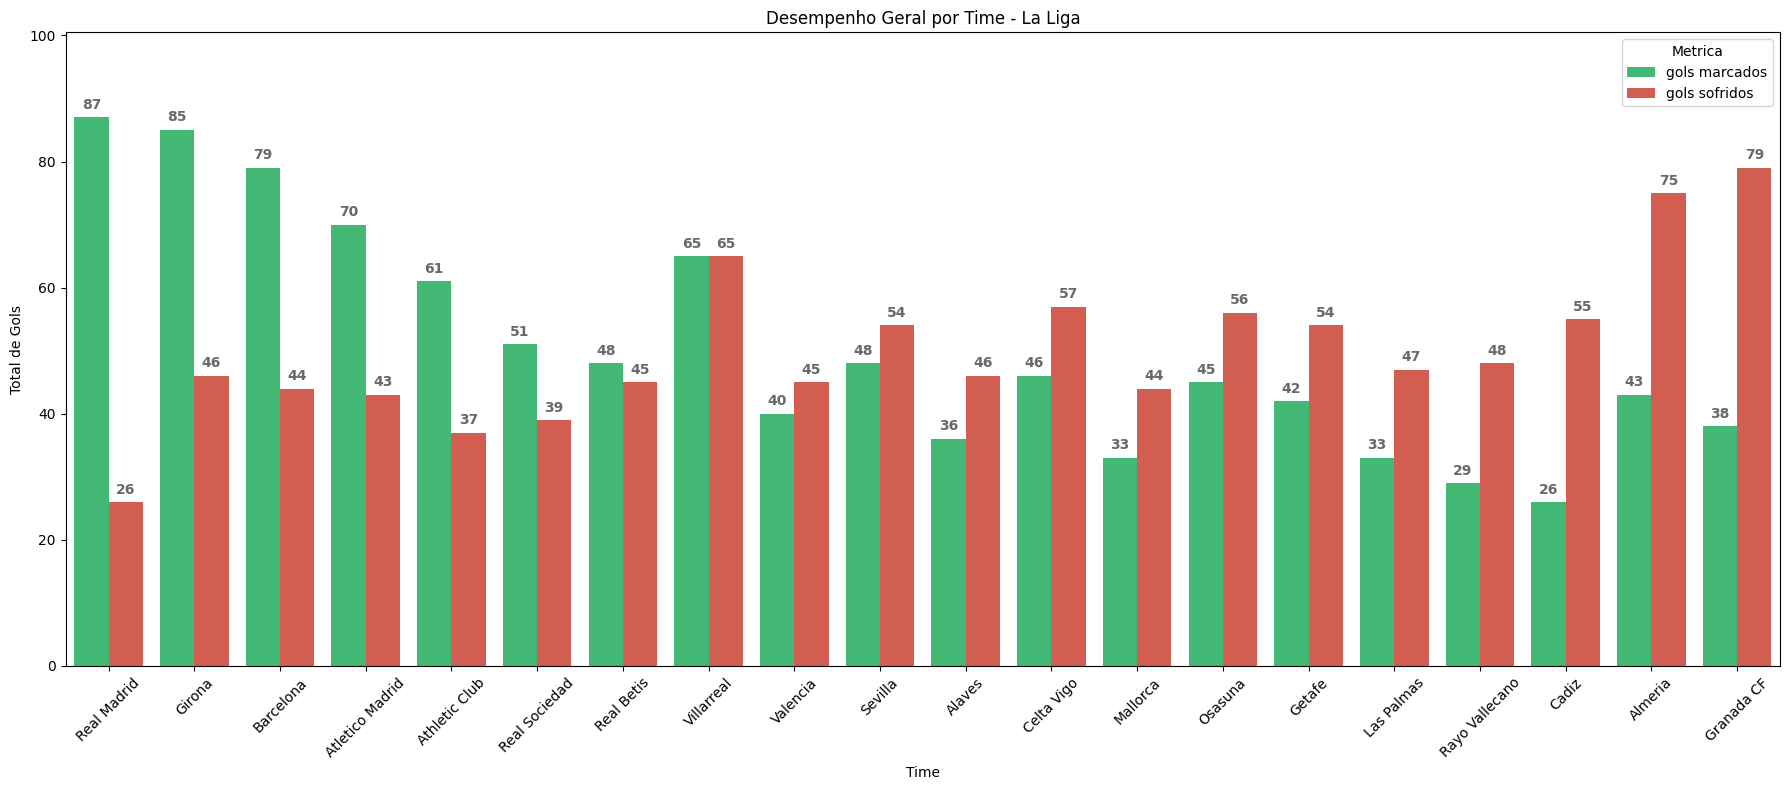

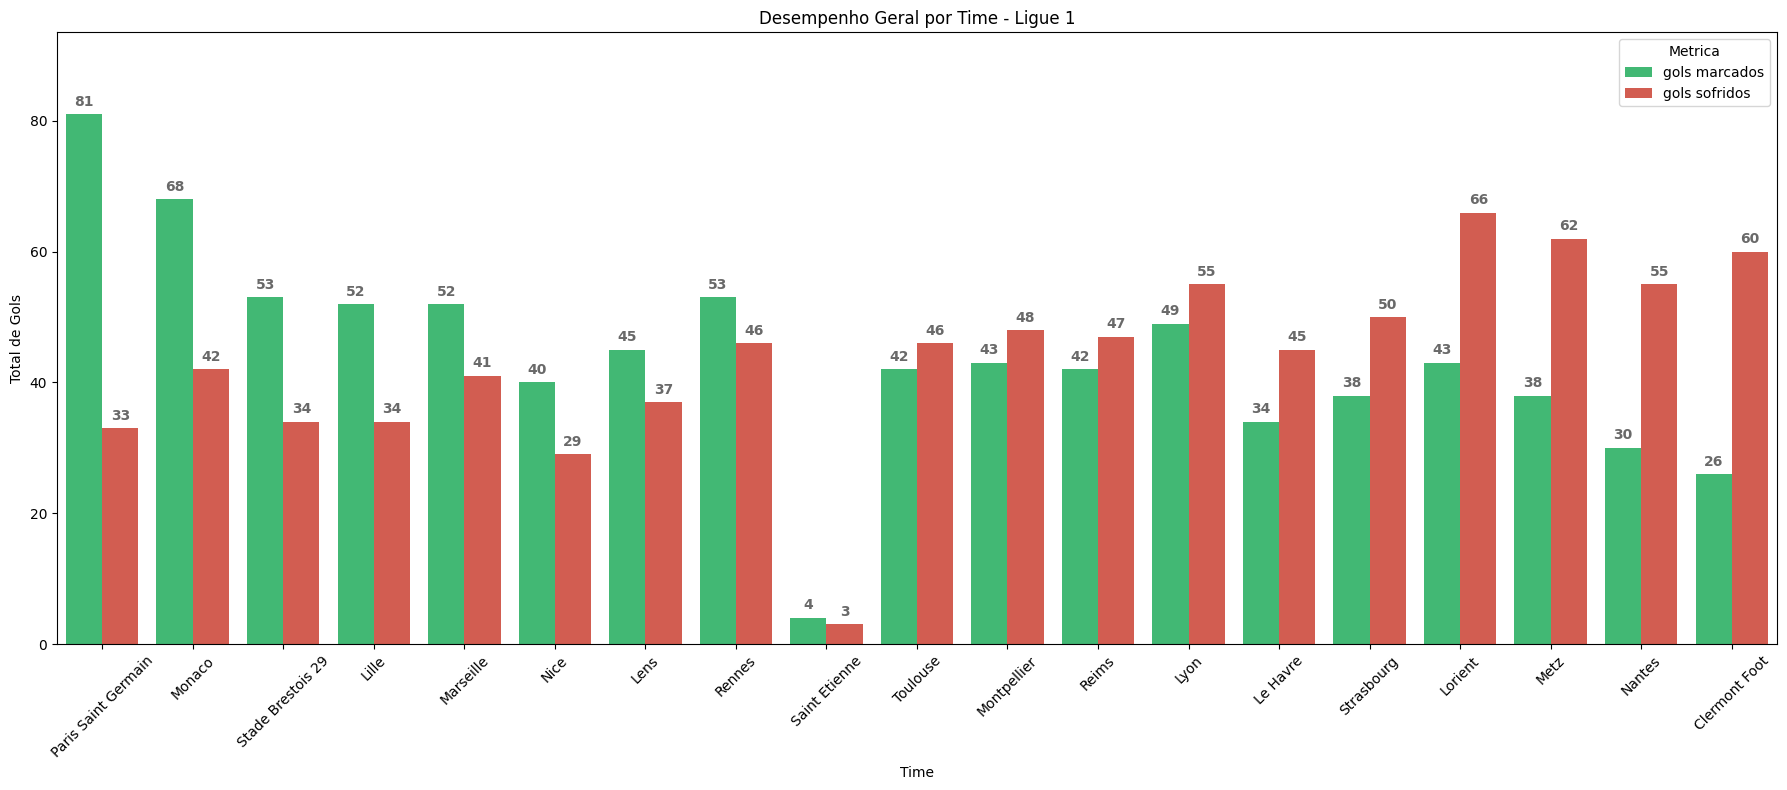

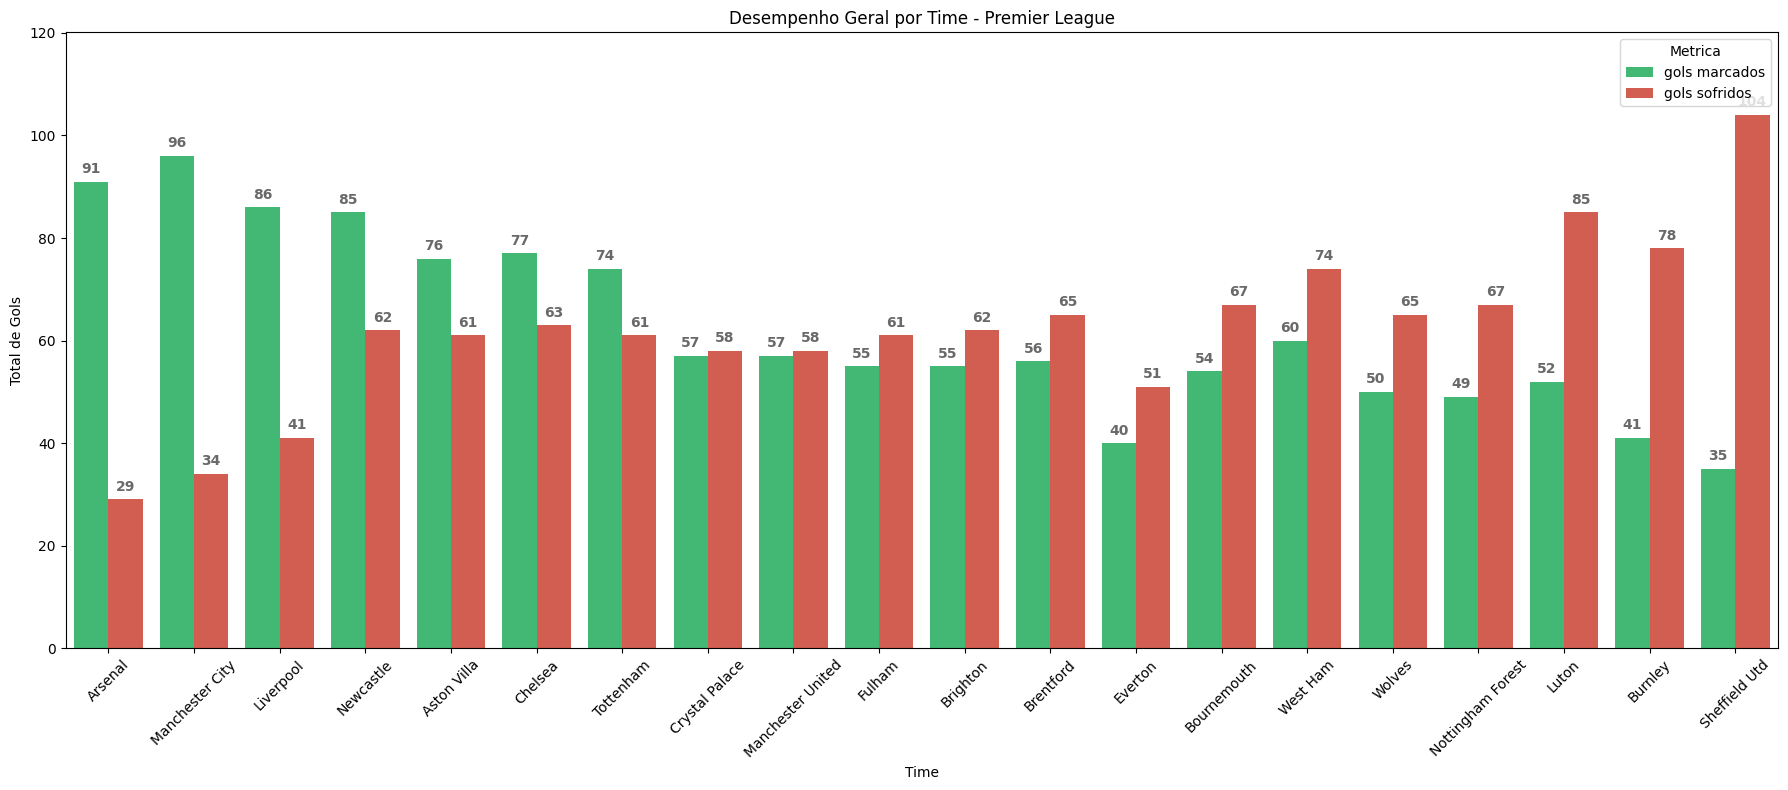

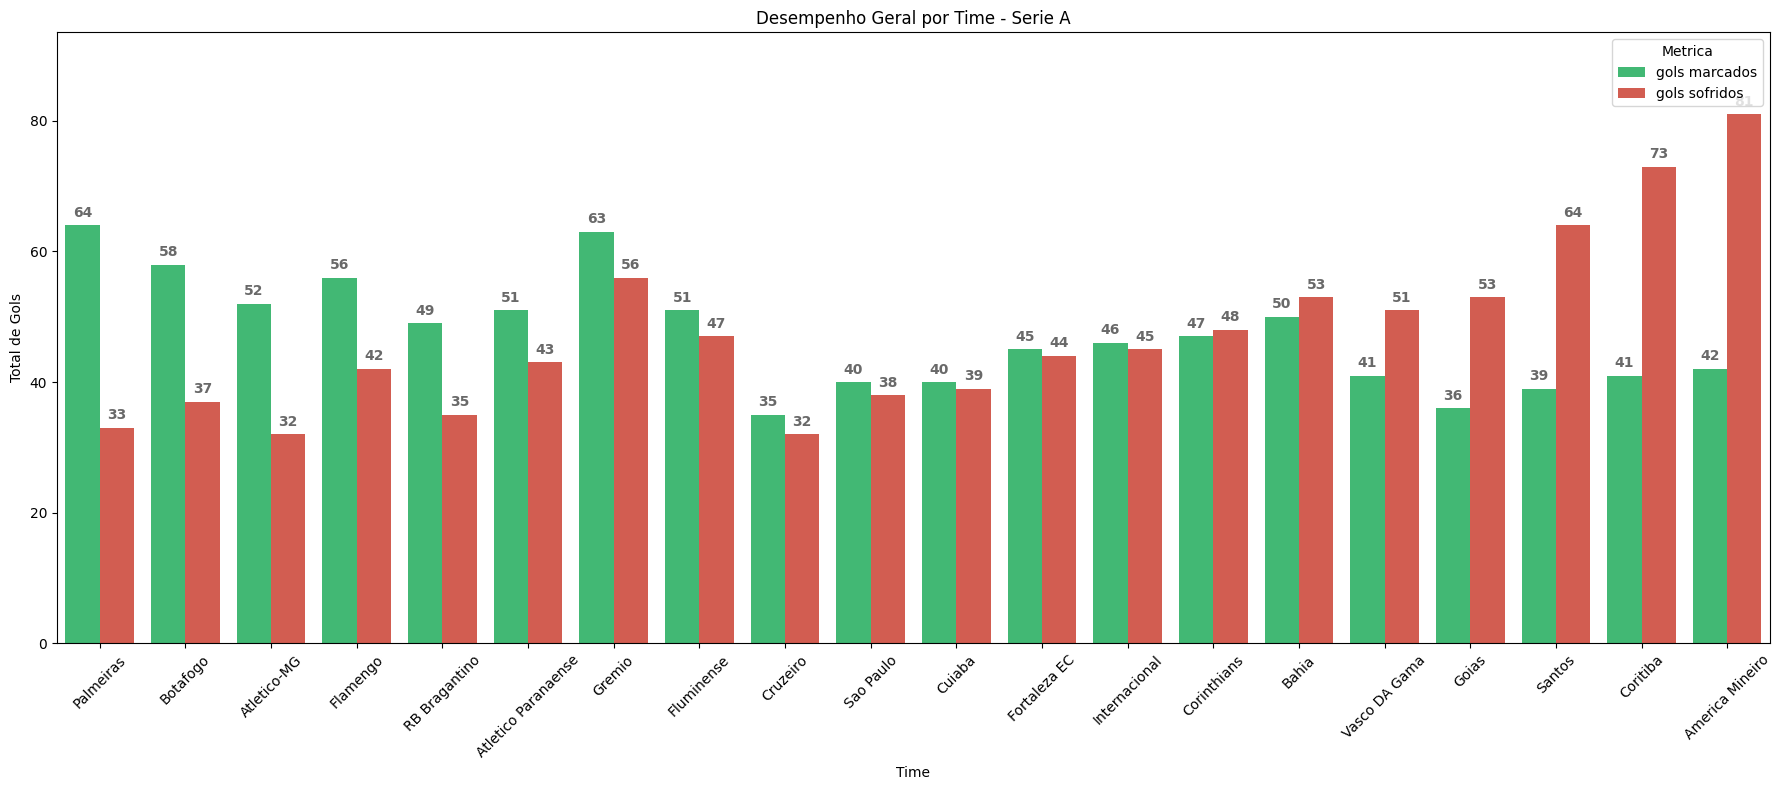

In [6]:
df_agregado = pd.merge(
    team_goals,
    team_goals_taken,
    on=['league.name', 'time', 'tipo']
)

df_agregado.rename(columns={'gols': 'gols marcados'}, inplace=True)

df_melted = pd.melt(
    df_agregado,
    id_vars=['league.name', 'time', 'tipo'],
    value_vars=['gols marcados', 'gols sofridos'],
    var_name='metrica',
    value_name='total'
)

df_total = df_agregado.groupby(['league.name', 'time'])[['gols marcados', 'gols sofridos']].sum().reset_index()
df_total['saldo'] = df_total['gols marcados'] - df_total['gols sofridos']
df_total = df_total.sort_values(['league.name', 'saldo'], ascending=[True, False])

df_plot = pd.melt(
    df_total, 
    id_vars=['league.name', 'time'], 
    value_vars=['gols marcados', 'gols sofridos'], 
    var_name='metrica', 
    value_name='total'
)

# Plot dos graficos

ligas = df_total['league.name'].unique()

for liga in ligas:
    league_data = df_plot[df_plot['league.name'] == liga]
    teams_order = df_total[df_total['league.name'] == liga]['time']

    plt.figure(figsize=(18,8))
    ax = sns.barplot(data=league_data, x='time', y='total', hue='metrica', 
                     palette=['#2ecc71', '#e74c3c'], order=teams_order, errorbar=None)

    # Adiciona o rotulo de dados
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0,9),
                        textcoords='offset points',
                        fontsize=10,
                        color='dimgray',
                        weight='bold')

    ax.set_title(f'Desempenho Geral por Time - {liga}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Total de Gols')
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1)

    plt.xticks(rotation=45)
    plt.legend(title='Metrica')
    plt.tight_layout()
    plt.show()